Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

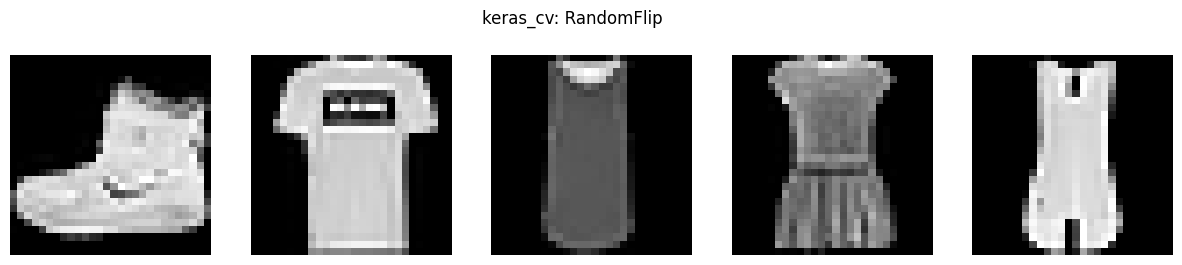

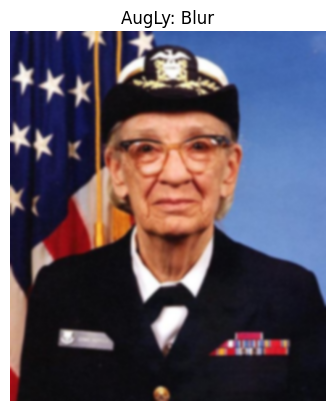

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Original: Deep learning models are very powerful but need lots of data.
Augmented: ['Oceanic abyss scholarship models are rattling powerful only need lots of data.']
✅ Horizontal flip saved to /content/sample_video_flipped.mp4
Original Shape: (150, 4) , After SMOTE: (150, 4)


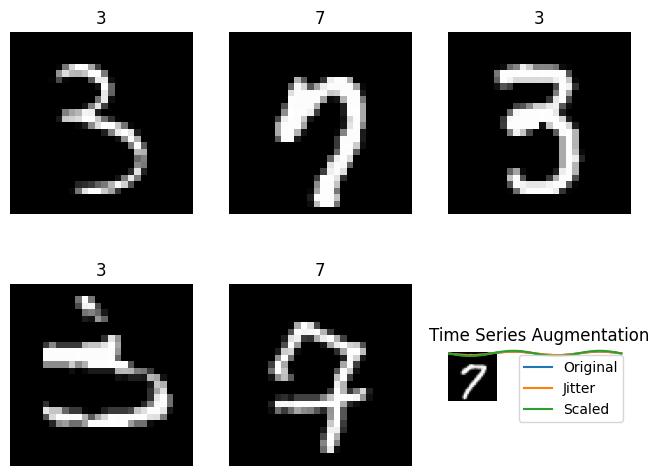

✅ Saved noisy audio as noisy.wav


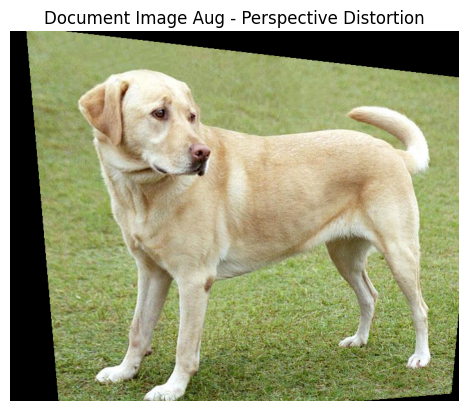

✅ All augmentations demonstrated.


In [3]:

!pip install -q keras-cv nlpaug imbalanced-learn fastai augly torch torchaudio ffmpeg-python vidgear
!apt-get update && apt-get install -y ffmpeg




import tensorflow as tf
import keras_cv
import matplotlib.pyplot as plt
import numpy as np
np.float = np.float64

import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import augly.image as imaugs
import augly.text as txtaugs
import augly.audio as audaugs
import augly.video as vidaugs
from fastai.vision.all import *
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torchaudio
import warnings
warnings.filterwarnings("ignore")


def keras_cv_image_aug():
    (x_train, y_train), _ = tf.keras.datasets.fashion_mnist.load_data()
    x_train = x_train[:5].astype("float32") / 255.0
    x_train = tf.expand_dims(x_train, -1)
    aug = keras_cv.layers.RandomFlip("horizontal")
    fig, axes = plt.subplots(1, 5, figsize=(15,3))
    for i in range(5):
        aug_img = aug(x_train[i])
        axes[i].imshow(tf.squeeze(aug_img), cmap='gray')
        axes[i].axis('off')
    plt.suptitle("keras_cv: RandomFlip")
    plt.show()

def augly_image_demo():
    from PIL import Image
    img = Image.open(tf.keras.utils.get_file('grace_hopper.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg'))
    out = imaugs.blur(img)
    plt.imshow(out)
    plt.title("AugLy: Blur")
    plt.axis('off')
    plt.show()

def fastai_aug_demo():
    path = untar_data(URLs.MNIST_SAMPLE)
    dls = ImageDataLoaders.from_folder(path, valid='valid')
    dls.show_batch(max_n=6, figsize=(8, 6))

keras_cv_image_aug()
augly_image_demo()
fastai_aug_demo()


def nlpaug_text_demo():
    import nltk

    # Download necessary packages with graceful fallbacks
    try:
        nltk.download('punkt', quiet=True)
        nltk.download('wordnet', quiet=True)
        nltk.download('averaged_perceptron_tagger', quiet=True)
        nltk.download('omw-1.4', quiet=True)
        nltk.download('averaged_perceptron_tagger_eng')
    except Exception as e:
        print(f"Download error: {e}")

    try:
        from nlpaug.augmenter.word import SynonymAug
        text = "Deep learning models are very powerful but need lots of data."
        aug = SynonymAug(aug_src='wordnet')
        augmented = aug.augment(text)
        print("Original:", text)
        print("Augmented:", augmented)
    except Exception as e:
        print(f"Augmentation failed: {e}")



nlpaug_text_demo()


import cv2
import os

def opencv_video_demo():
    import urllib.request

    # Download video
    video_url = "https://download.samplelib.com/mp4/sample-5s.mp4"
    input_path = "/content/sample_video.mp4"
    output_path = "/content/sample_video_flipped.mp4"
    urllib.request.urlretrieve(video_url, input_path)

    # Open video
    cap = cv2.VideoCapture(input_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 25.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        flipped = cv2.flip(frame, 1)  # Horizontal flip
        out.write(flipped)

    cap.release()
    out.release()
    print(f"✅ Horizontal flip saved to {output_path}")




opencv_video_demo()



def tabular_aug_demo():
    data = load_iris()
    X, y = data.data, data.target
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    sm = SMOTE()
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("Original Shape:", X.shape, ", After SMOTE:", X_res.shape)

tabular_aug_demo()


def time_series_aug():
    ts = np.sin(np.linspace(0, 4*np.pi, 100))
    jittered = ts + np.random.normal(0, 0.1, size=ts.shape)
    scaled = ts * 1.5
    plt.plot(ts, label="Original")
    plt.plot(jittered, label="Jitter")
    plt.plot(scaled, label="Scaled")
    plt.legend()
    plt.title("Time Series Augmentation")
    plt.show()

time_series_aug()


def audio_aug_demo():
    wave, sr = torchaudio.load(torchaudio.utils.download_asset("tutorial-assets/steam-train-whistle-daniel_simon.wav"))
    noise = 0.005 * torch.randn(wave.size())
    wave_noisy = wave + noise
    torchaudio.save("noisy.wav", wave_noisy, sample_rate=sr)
    print("✅ Saved noisy audio as noisy.wav")

audio_aug_demo()


def doc_img_aug():
    img = Image.open(tf.keras.utils.get_file('sample_img.png', 'https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg'))

    distorted = imaugs.perspective_transform(img)
    plt.imshow(distorted)
    plt.title("Document Image Aug - Perspective Distortion")
    plt.axis('off')
    plt.show()

doc_img_aug()

print("✅ All augmentations demonstrated.")